# Dealing with Outliers

Sometimes outliers can mess up an analysis; you usually don't want a handful of data points to skew the overall results. Let's revisit our example of income data, with some random billionaire thrown in:

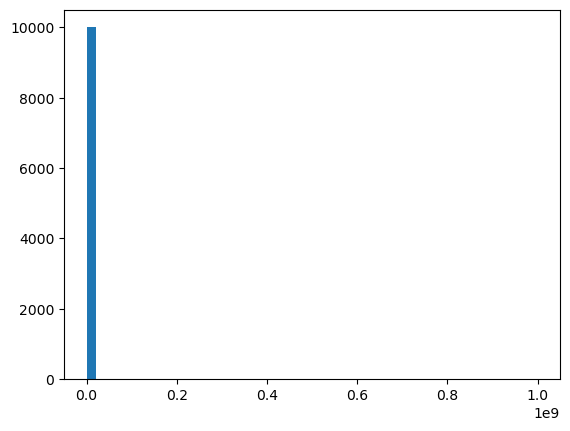

In [3]:
from sphinx.addnodes import index
%matplotlib inline
import numpy as np

incomes = np.random.normal(27000, 15000, 10000) 
#distribuição de 27k, com desvio padrao de 15k e 10k receitas
incomes = np.append(incomes, [1000000000])
#exemplo outlier, dado distópico

import matplotlib.pyplot as plt
plt.hist(incomes, 50)
plt.show()

Ao colocar um bilionário em meio a rendas claramente menores, até nossa média acaba gerando um dado "falso", haja visto que todas as outras rendas foram corrompidas por somente um dado que alavanca todo o resto.

In [4]:
incomes.mean()

126984.71561071713

Montando uma função para excluírmos as aberrações do nosso gráfico podemos encontrar um resultado mais condizente com a realidade, assim, é mais fácil verificar certo dados sem ser enganado pelos outliers.

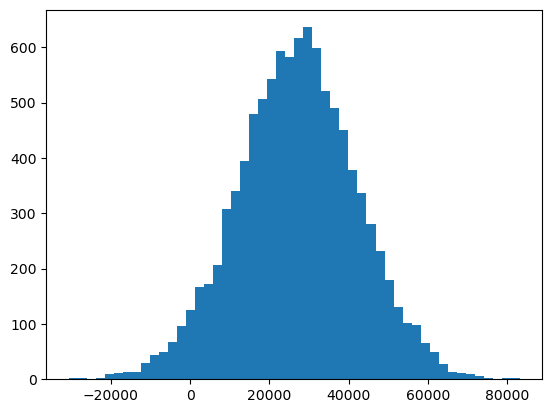

In [5]:
def reject_outliers(data):
    u = np.median(data) #cálculo de mediana
    s = np.std(data) #cálculo do desvio padrao
    filtered = [e for e in data if (u - 2 * s < e < u + 2 * s)]
    #verificacao se está dentro dos parametros anteriores
    return filtered

filtered = reject_outliers(incomes) #variavel sem as aberraçoes (outliers)

plt.hist(filtered, 50)
plt.show()

Fazendo a verificação da média, encontramos algo mais verdadeiro.

In [6]:
np.mean(filtered)

26997.414082278203

## Activity

Instead of a single outlier, add several randomly-generated outliers to the data. Experiment with different values of the multiple of the standard deviation to identify outliers, and see what effect it has on the final results.

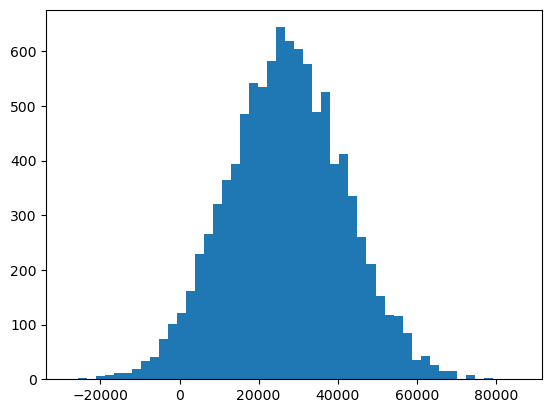

In [31]:
%matplotlib inline
import numpy as np

incomes = np.random.normal(27000, 15000, 10000) 

outliers = np.random.normal(100000000, 100000, 250) 
#outliers com 250 exemplos com desvio padrao de 100k


import matplotlib.pyplot as plt
plt.hist(incomes, 50)
plt.show()

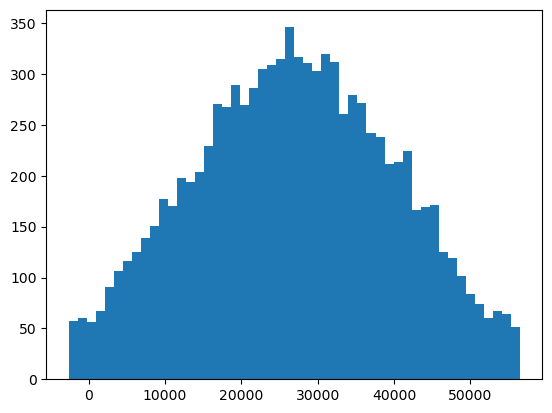

In [35]:
def reject_outliers(data):
    u = np.median(data)
    s = np.std(data) 
    filtered = [e for e in data if (u - 2 * s < e < u + 2 * s)]
    return filtered

filtered = reject_outliers(incomes)

plt.hist(filtered, 50) #verificacao
plt.show()

É possível verificar a diferença entre os gráficos, com amostras maiores, em mais quantidades e desvios maiores averiguamos uma expansão do gráfico por conta disso.

In [33]:
np.mean(filtered)

26864.90051890417